## Workshop Week 5

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pylab as plt

sns.set_theme()
%matplotlib inline

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [36]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.

### Descriptive statistics

In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Pair plots

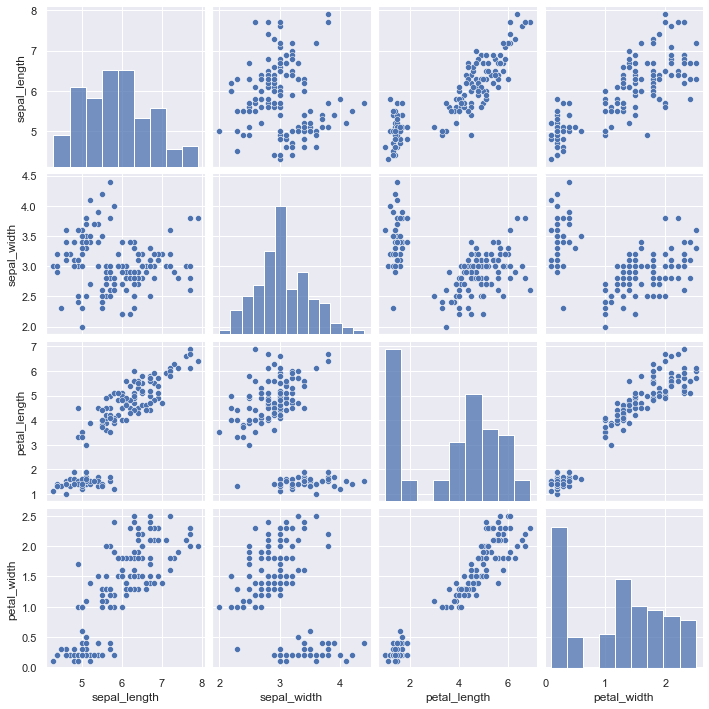

In [39]:
sns.pairplot(data=iris)

### Correlation

In [40]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

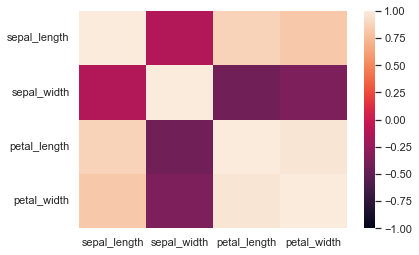

In [41]:
sns.heatmap(data=iris.corr(),vmax=1, vmin=-1)

## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


In [42]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.41575542] + -0.3630755213190304


We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [43]:
reg.predict(X[:3])

array([0.21898206, 0.21898206, 0.17740652])

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [44]:
for x in X.petal_length[:3]:
    print('Predicted value Y=', x * reg.coef_[0] + reg.intercept_, 'when x=', x)

Predicted value Y= 0.2189820615743462 when x= 1.4
Predicted value Y= 0.2189820615743462 when x= 1.4
Predicted value Y= 0.17740651993910506 when x= 1.3


## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [45]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.042067309194993165
R Squared: 0.9271098389904927


## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [46]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.44937611 -0.08221782] + -0.008995972698171872


You can test the model in the same way as before.  Did the model get better? 

In [47]:
predicted = reg.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.040962085264089815
R Squared: 0.9290248640257687


## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [48]:
train, test = train_test_split(iris, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your first checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

### Look at train and test data

In [49]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.826667,3.079167,3.695000,1.176667
std,0.814339,0.447194,1.795927,0.781265
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
test.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,30.000000,30.000000,30.000000,30.00000
mean,5.910000,2.970000,4.010000,1.29000
std,0.892246,0.381603,1.641351,0.68549
min,4.400000,2.000000,1.300000,0.20000
25%,5.100000,2.800000,3.125000,1.02500
50%,5.850000,2.950000,4.450000,1.35000
75%,6.300000,3.200000,5.075000,1.77500
max,7.700000,3.700000,6.700000,2.50000


### Train the model with train data

In [51]:
reg_model = linear_model.LinearRegression()
X_train = train[['petal_length', 'sepal_length']]
y_train = train['petal_width']
reg_model.fit(X_train, y_train)
print("y = x *", reg_model.coef_, "+", reg_model.intercept_)

y = x * [ 0.45215268 -0.0838631 ] + -0.005395165634702659


### Evaluate model using train data

In [52]:
predicted = reg_model.predict(X_train)
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.04305362959165906
R Squared: 0.9288709401709135


### Evaluate model using test data

In [53]:
X_test = test[['petal_length', 'sepal_length']]
y_test = test['petal_width']
predicted = reg_model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.0327643587787861
R Squared: 0.9278688806513845


Text(0.5, 1.0, 'Relation between actual and predicted petal width')

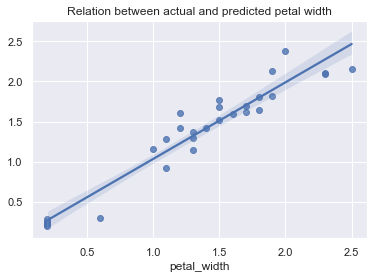

In [54]:

sns.regplot(x=y_test, y=predicted)
plt.title('Relation between actual and predicted petal width')

### Student conclusion

Base on the training and testing evaluation, we see that:
- Evaluate on both training and testing data yield quite low MSE score, at 0.043 and 0.033 respectively. This shows that our model gives quite good prediction with both seen and unseen data.
- The coefficient of determination (R2) of the model is quite good with both the training data and test data, at 0.929 and 0.928, which indicates our model explain the data well.
- Overfitting is not the case here since we see that the model give quite good predictions with unforseen data.

# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

Add cells as per your need and answer all the above questions.

In [55]:
mpg = sns.load_dataset('mpg')

In [56]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Explore the dataset

In [57]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [58]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

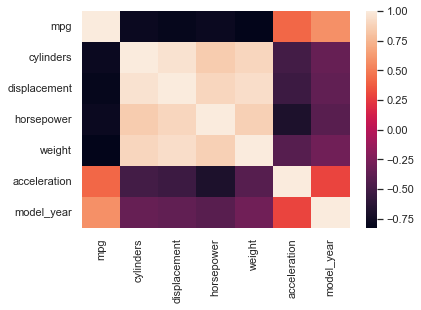

In [59]:
sns.heatmap(data=mpg.corr())

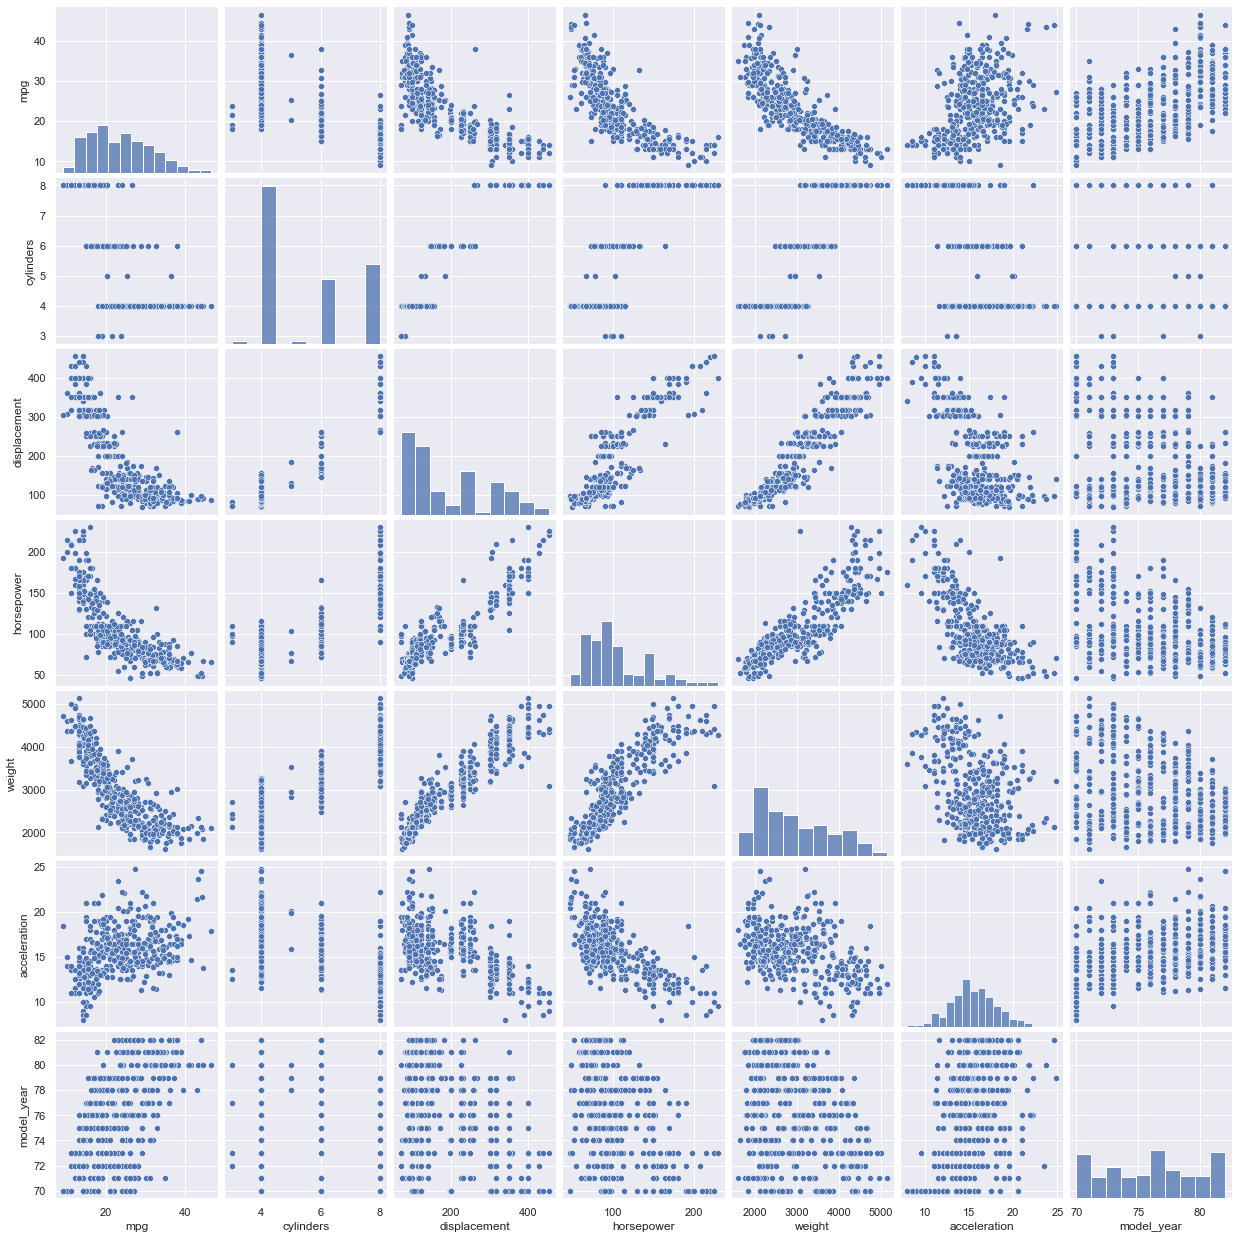

In [60]:
sns.pairplot(data=mpg)

### Split data into training and testing set

In [61]:
mpg_train, mpg_test = train_test_split(mpg, test_size=0.2,random_state=1412)
print(mpg_train.shape)
print(mpg_test.shape)

(318, 9)
(80, 9)


### Use model to predict MPG from the weight of the car and evaluate

In [62]:
mpg_model = linear_model.LinearRegression()
X_train = mpg_train[['weight']]
y_train = mpg_train['mpg']
mpg_model.fit(X_train, y_train)
print("y = x *", mpg_model.coef_, "+", mpg_model.intercept_)

y = x * [-0.00783053] + 46.87986972288793


#### Evaluate base on train data

In [63]:
predicted = mpg_model.predict(X_train)
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 19.532479985248088
R Squared: 0.6986665373458405


#### Evaluate model base on test data

In [64]:
X_test = mpg_test[['weight']]
y_test = mpg_test['mpg']
predicted_1= mpg_model.predict(X_test)
mse = mean_squared_error(y_test, predicted_1)
r2 = r2_score(y_test, predicted_1)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 15.933034632743865
R Squared: 0.6488451977157496


### Adding more features to the model

In the correlation table, we can see that in term of correlation with mpg, **weight** comes first and **displacement** comes second. So we can choose displacement to add to our model.

In [65]:
mpg_model = linear_model.LinearRegression()
X_train = mpg_train[['weight', 'displacement']]
y_train = mpg_train['mpg']
mpg_model.fit(X_train, y_train)
print("y = x *", mpg_model.coef_, "+", mpg_model.intercept_)

y = x * [-0.00630095 -0.01342439] + 44.921343306218645


#### Evaluate base on train data

In [66]:
predicted = mpg_model.predict(X_train)
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 19.27657918582768
R Squared: 0.7026143961965117


#### Evaluate base on test data

In [67]:
X_test = mpg_test[['weight','displacement']]
y_test = mpg_test['mpg']
predicted_2 = mpg_model.predict(X_test)
mse = mean_squared_error(y_test, predicted_2)
r2 = r2_score(y_test, predicted_2)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 15.13845488819364
R Squared: 0.6663572724415016


**This is your final checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

Table below indicate the MSE and $R^2$ on the test set of our models when using 1 feature and 2 feature to fit.
<table>
  <tr>
    <th></th>
    <th>MSE</th>
    <th> R<sup>2</sup> </th>
  </tr>
  <tr>
    <td>1 feature model</td>
    <td>15.93</td>
    <td>0.65</td>
  </tr>
  <tr>
    <td>2 features model</td>
    <td>15.14</td>
    <td>0.67</td>
  </tr>
</table>

We can see a small reduction in MSE when using 2 features to train compare with using just 1 feature **weight**, which indicates that our model make better predictions. Moreover, the $R^2$ values increase in 2 feature model cases is also an positive sign.

In conclusion, in this case, adding more features do improve the model performance. Also, the model is not overfitting because the MSE score on training and testing data is acceptable, meaning that it can properly predict unforseen data.

Text(0.5, 1.0, 'Relation between actual and predicted MPG')

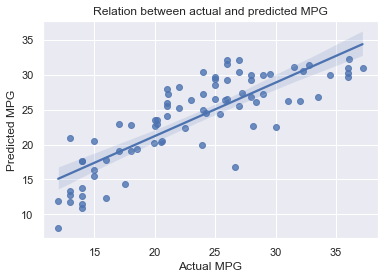

In [68]:
sns.regplot(x=y_test, y=predicted_2)
plt.ylabel('Predicted MPG')
plt.xlabel('Actual MPG')
plt.title('Relation between actual and predicted MPG')

## Commit your finished work on Github
Here are the list of steps you need to follow to commit your work on Github to get checkpoint mark for this week.

Once you finished all the above questions, save the notebook by clicking 'save' button in the toolbar.

You need to follow the same instructions to commit your work on your Github repository.

Step 1. Change your current directory to `practical-workshops-yourName` by doing `cd` command. You can type:
                    `cd practical-workshops-yourName`
                    
Step 2: Add your Workshop Week 5.ipynb using:
                 `git add "Workshop Week 5.ipynb`
                 
Step 3: Commit your work:
                `git commit -m "Finished Workshop 5`
                
Step 4: Push your changes:
                `git push origin master`
                
Step 5: Confirm whether your finished work is now on Github repository by signing into your Github account and clicking on your repository. You can see your added `Workshop Week 5.ipynb` file as well as your `commit message` and `time` of your commit.

Step 6: Well done!. You have now finished your Practical Workshop Week 5. Appreciate yourself.